In [1]:
# library for data description and viz.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# library for preprocessing, model, pipeline and Decision Tree
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn import metrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# data import and take a glance

In [3]:
df = pd.read_csv('./heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# checking data integrity
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


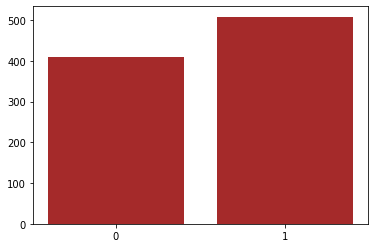

total Heart Disease result
1    508
0    410
Name: HeartDisease, dtype: int64
Percentage of patient do have Heart Disease: 0.553377 
Percentage of patient DON'T have Heart Disease: 0.446623 


In [5]:
# checking whether data skewed or not
plt.bar([0,1],[df.HeartDisease.value_counts()[0],df.HeartDisease.value_counts()[1]], color='brown')
plt.xticks([0,1], [0,1])
plt.show()

print('total Heart Disease result')
print(df.HeartDisease.value_counts())
print('Percentage of patient do have Heart Disease: %f '%(df.HeartDisease.value_counts()[1]/df.HeartDisease.value_counts().sum()))
print('Percentage of patient DON\'T have Heart Disease: %f '%(df.HeartDisease.value_counts()[0]/df.HeartDisease.value_counts().sum()))

In [6]:
# take a sip of Numerical data
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [7]:
# classify data format(type)
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
categorical = df.select_dtypes('object').columns
print(f'Numerical Columns:  {df[numerical].columns}')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


# Numerical Data Analysis (numerical EDA)

Distrubution of  Age


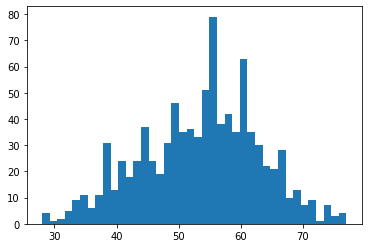

----------------------------------------------------------------------------------------------------
Distrubution of  RestingBP


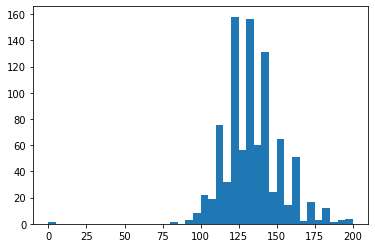

----------------------------------------------------------------------------------------------------
Distrubution of  Cholesterol


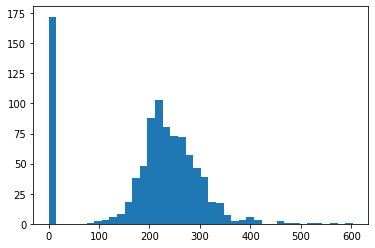

----------------------------------------------------------------------------------------------------
Distrubution of  FastingBS


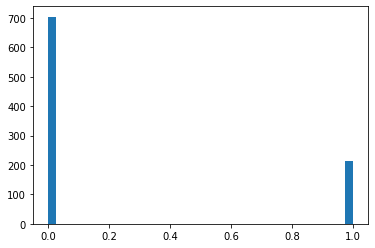

----------------------------------------------------------------------------------------------------
Distrubution of  MaxHR


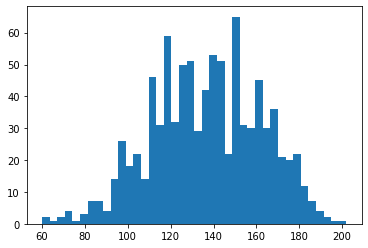

----------------------------------------------------------------------------------------------------
Distrubution of  Oldpeak


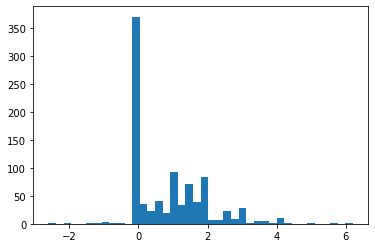

----------------------------------------------------------------------------------------------------


In [8]:
for i in df[numerical]:
    print("Distrubution of ", i)
    plt.hist(df[i], bins=40)
    plt.show()
    print('-'*100)

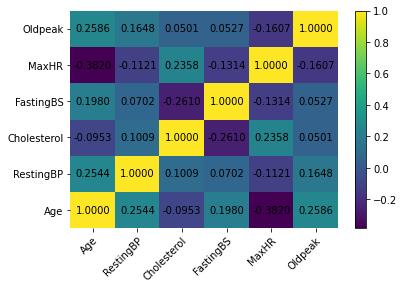

In [9]:
# Heatmap of numerical data correlation
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(df[numerical].count()))+.5)
ax.set_yticks(np.arange(len(df[numerical].count()))+.5)

ax.set_xticklabels(df[numerical])
ax.set_yticklabels(df[numerical])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.spines[:].set_visible(False)
ax.tick_params(which="minor", bottom=False, left=False)

df_num_corr = df[numerical].corr().to_numpy()
for y in range(len(df[numerical].count())):
    for x in range(len(df[numerical].count())):
        plt.text(x+0.5, y+0.5, '%.4f' % df_num_corr[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

heatmap = plt.pcolor(df[numerical].corr())
plt.colorbar(heatmap)


# Categorical Data Analylsis (categorical EDA)

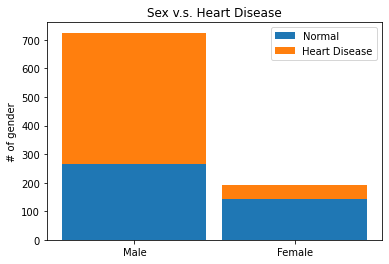

In [10]:
df_s_hd = df[['Sex', 'HeartDisease']]
labels = ['Male', 'Female']
nHD = [len(df_s_hd.loc[(df_s_hd['Sex']=='M') & (df_s_hd['HeartDisease']==0)]),
      len(df_s_hd.loc[(df_s_hd['Sex']=='F') & (df_s_hd['HeartDisease']==0)])]
HD = [len(df_s_hd.loc[(df_s_hd['Sex']=='M') & (df_s_hd['HeartDisease']==1)]),
        len(df_s_hd.loc[(df_s_hd['Sex']=='F') & (df_s_hd['HeartDisease']==1)])]

width = 0.90       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, nHD, width, label='Normal')
ax.bar(labels, HD, width, bottom=nHD, label='Heart Disease')

ax.set_ylabel('# of gender')
ax.set_title('Sex v.s. Heart Disease')
ax.legend()

plt.show()

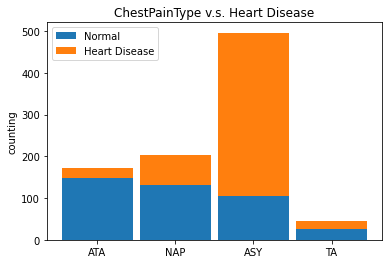

In [11]:
df_cpt_hd = df[['ChestPainType', 'HeartDisease']]
labels = ['ATA', 'NAP','ASY','TA']
nHD = [len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='ATA') & (df_cpt_hd['HeartDisease']==0)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='NAP') & (df_cpt_hd['HeartDisease']==0)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='ASY') & (df_cpt_hd['HeartDisease']==0)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='TA') & (df_cpt_hd['HeartDisease']==0)])
      ]
HD = [len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='ATA') & (df_cpt_hd['HeartDisease']==1)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='NAP') & (df_cpt_hd['HeartDisease']==1)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='ASY') & (df_cpt_hd['HeartDisease']==1)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='TA') & (df_cpt_hd['HeartDisease']==1)])
      ]

width = 0.90       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, nHD, width, label='Normal')
ax.bar(labels, HD, width, bottom=nHD, label='Heart Disease')

ax.set_ylabel('counting')
ax.set_title('ChestPainType v.s. Heart Disease')
ax.legend()

plt.show()

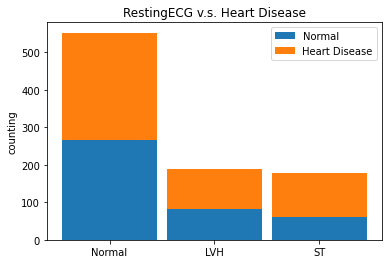

In [12]:
df_ecg_hd = df[['RestingECG', 'HeartDisease']]
labels = ['Normal', 'LVH','ST']
nHD = [len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='Normal') & (df_ecg_hd['HeartDisease']==0)]),
       len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='LVH') & (df_ecg_hd['HeartDisease']==0)]),
       len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='ST') & (df_ecg_hd['HeartDisease']==0)])
      ]
HD = [len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='Normal') & (df_ecg_hd['HeartDisease']==1)]),
       len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='LVH') & (df_ecg_hd['HeartDisease']==1)]),
       len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='ST') & (df_ecg_hd['HeartDisease']==1)])
      ]

width = 0.90       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, nHD, width, label='Normal')
ax.bar(labels, HD, width, bottom=nHD, label='Heart Disease')

ax.set_ylabel('counting')
ax.set_title('RestingECG v.s. Heart Disease')
ax.legend()

plt.show()

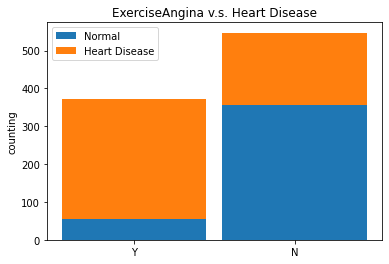

In [13]:
df_ea_hd = df[['ExerciseAngina', 'HeartDisease']]
labels = ['Y','N']
nHD = [len(df_ea_hd.loc[(df_ea_hd['ExerciseAngina']=='Y') & (df_ea_hd['HeartDisease']==0)]),
       len(df_ea_hd.loc[(df_ea_hd['ExerciseAngina']=='N') & (df_ea_hd['HeartDisease']==0)])
      ]
HD = [len(df_ea_hd.loc[(df_ea_hd['ExerciseAngina']=='Y') & (df_ea_hd['HeartDisease']==1)]),
       len(df_ea_hd.loc[(df_ea_hd['ExerciseAngina']=='N') & (df_ea_hd['HeartDisease']==1)])
      ]

width = 0.90       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, nHD, width, label='Normal')
ax.bar(labels, HD, width, bottom=nHD, label='Heart Disease')

ax.set_ylabel('counting')
ax.set_title('ExerciseAngina v.s. Heart Disease')
ax.legend()

plt.show()

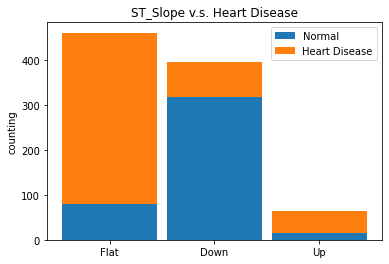

In [14]:
df_st_hd = df[['ST_Slope', 'HeartDisease']]
labels = ['Flat', 'Down','Up']
nHD = [len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Flat') & (df_st_hd['HeartDisease']==0)]),
       len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Up') & (df_st_hd['HeartDisease']==0)]),
       len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Down') & (df_st_hd['HeartDisease']==0)])
      ]
HD = [len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Flat') & (df_st_hd['HeartDisease']==1)]),
       len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Up') & (df_st_hd['HeartDisease']==1)]),
       len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Down') & (df_st_hd['HeartDisease']==1)])
      ]

width = 0.90       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, nHD, width, label='Normal')
ax.bar(labels, HD, width, bottom=nHD, label='Heart Disease')

ax.set_ylabel('counting')
ax.set_title('ST_Slope v.s. Heart Disease')
ax.legend()

plt.show()

# short conclusion of data description
Overall Insights from the Exploratory Data Analysis  
* Target variable(Heart Disease) has close to balanced data.  
* Numerical features have weak correlation with the target variable.  
* Oldpeak (depression related number) has a positive correlation with the heart disease.  
* Maximum heart rate has negative correlation with the heart disease.  
* Interestingly cholesterol has negative correlation with the heart disease.  
* Based on the gender; Men are almost 2.44 times more likely have a heart disease than women.  
* We can observe clear differences among the chest pain type.  
* Person with ASY: Asymptomatic chest pain has almost 6 times more likely have a heart disease than person with ATA Atypical Angina chest pain.  
* RestingECG: resting electrocardiogram results don't differ much.  
* Person with ST: having ST-T wave abnormality is more likely have a heart disease than the others.  
* ExerciseAngina: exercise-induced angina with 'Yes' almost 2.4 times more likley have a heart disaese than exercise-induced angina with 'No'  
* ST_Slope: the slope of the peak exercise ST segment has differences.  
* ST_Slope Up significantly less likely has heart disease than the other two segment.  

# Model Build

# Baseline Model -- Decision Tree
## algo is CART

## baseline encoder -- one-hot-encoder

In [15]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

ohe= OneHotEncoder()
data_encoded = ohe.fit_transform(df[categorical]) #WTF
ct= make_column_transformer((ohe, categorical), remainder='passthrough')

In [16]:
# ***********************Decision Tree Classification***********************
### gini as criterion
decTree = DecisionTreeClassifier(max_depth=3)
pipe = make_pipeline(ct, decTree)
pipe.fit(x_train, y_train)
# print(pipe)

y_pred_decTree = pipe.predict(x_test)
print("Accuracy of Decision Trees : " , metrics.accuracy_score(y_test, y_pred_decTree))

scores = cross_val_score(pipe, x, y, cv=10)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))
feature_names = pipe.named_steps['columntransformer'].transformers[0][1].get_feature_names(df[categorical].columns).tolist()+df[numerical].columns.tolist()

print('-'*50)
print('Rules are below : ')
print('-'*50)
text_representation = tree.export_text(decTree, feature_names)
print(text_representation)

# print(tree.plot_tree(decTree))


Accuracy of Decision Trees :  0.8188405797101449
cv-10 average score is : 80.48 %
--------------------------------------------------
Rules are below : 
--------------------------------------------------
|--- ST_Slope_Up <= 0.50
|   |--- ChestPainType_ASY <= 0.50
|   |   |--- Sex_F <= 0.50
|   |   |   |--- class: 1
|   |   |--- Sex_F >  0.50
|   |   |   |--- class: 0
|   |--- ChestPainType_ASY >  0.50
|   |   |--- Sex_M <= 0.50
|   |   |   |--- class: 1
|   |   |--- Sex_M >  0.50
|   |   |   |--- class: 1
|--- ST_Slope_Up >  0.50
|   |--- Cholesterol <= 42.50
|   |   |--- FastingBS <= 0.50
|   |   |   |--- class: 1
|   |   |--- FastingBS >  0.50
|   |   |   |--- class: 1
|   |--- Cholesterol >  42.50
|   |   |--- ChestPainType_ASY <= 0.50
|   |   |   |--- class: 0
|   |   |--- ChestPainType_ASY >  0.50
|   |   |   |--- class: 0



In [17]:
# ***********************Decision Tree Classification***********************
### entropy as criterion
decTree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
pipe = make_pipeline(ct, decTree)
pipe.fit(x_train, y_train)
# print(pipe)

y_pred_decTree = pipe.predict(x_test)
print("Accuracy of Decision Trees : " , metrics.accuracy_score(y_test, y_pred_decTree))

scores = cross_val_score(pipe, x, y, cv=10)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))
feature_names = pipe.named_steps['columntransformer'].transformers[0][1].get_feature_names(df[categorical].columns).tolist()+df[numerical].columns.tolist()

print('-'*50)
print('Rules are below : ')
print('-'*50)
text_representation = tree.export_text(decTree, feature_names)
print(text_representation)

# print(tree.plot_tree(decTree))

Accuracy of Decision Trees :  0.8333333333333334
cv-10 average score is : 81.14 %
--------------------------------------------------
Rules are below : 
--------------------------------------------------
|--- ST_Slope_Up <= 0.50
|   |--- ChestPainType_ASY <= 0.50
|   |   |--- Sex_M <= 0.50
|   |   |   |--- class: 0
|   |   |--- Sex_M >  0.50
|   |   |   |--- class: 1
|   |--- ChestPainType_ASY >  0.50
|   |   |--- Sex_F <= 0.50
|   |   |   |--- class: 1
|   |   |--- Sex_F >  0.50
|   |   |   |--- class: 1
|--- ST_Slope_Up >  0.50
|   |--- ChestPainType_ASY <= 0.50
|   |   |--- Age <= 56.50
|   |   |   |--- class: 0
|   |   |--- Age >  56.50
|   |   |   |--- class: 0
|   |--- ChestPainType_ASY >  0.50
|   |   |--- Oldpeak <= 0.40
|   |   |   |--- class: 0
|   |   |--- Oldpeak >  0.40
|   |   |   |--- class: 1



# Dummy

In [18]:
from sklearn.dummy import DummyClassifier

In [19]:
accuracy=[]

# defining model
model = DummyClassifier(strategy='constant', constant=0)
pipe = make_pipeline(ct, model)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

accuracy.append(round(metrics.accuracy_score(y_test, y_pred),4))
print (f'model : {model} and  accuracy score is : {round(metrics.accuracy_score(y_test, y_pred),4)}')

model_names = ['DummyClassifier']
dummy_result_df = pd.DataFrame({'Accuracy':accuracy}, index=model_names)

#  10 fold cross validation
print('#'*100)
print('Cross Validate 10 fold: ')
scores = cross_val_score(pipe, x, y, cv=10)
print(scores)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))
print('#'*100)


dummy_result_df


model : DummyClassifier(constant=0, random_state=None, strategy='constant') and  accuracy score is : 0.442
####################################################################################################
Cross Validate 10 fold: 
[0.44565217 0.44565217 0.44565217 0.44565217 0.44565217 0.44565217
 0.44565217 0.44565217 0.45054945 0.45054945]
cv-10 average score is : 44.66 %
####################################################################################################


,Accuracy
DummyClassifier,0.44


# Logistic, Linear Discriminant, SVC, KNN

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# defining model
lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

In [24]:
models = [lr,lda,svm,knn]
accuracy=[]

for model in models: 
    pipe = make_pipeline(ct, model)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    accuracy.append(round(scores.mean()*100 ,4))
    print('#'*100)
    scores = cross_val_score(pipe, x, y, cv=10)
    print (f'model {model} \naverage 10-fold cross validation accuracy score is : {round(scores.mean()*100,4)}')
    print('#'*100)
    
model_names = ['Logistic','LinearDiscriminant','SVM','KNeighbors']
result_df1 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df1

####################################################################################################
model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) 
average 10-fold cross validation accuracy score is : 85.2723
####################################################################################################
####################################################################################################
model LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 
average 10-fold cross validation accuracy score is : 84.7289
###############################################################################

,Accuracy
Logistic,70.24
LinearDiscriminant,85.27
SVM,84.73
KNeighbors,70.57


# Logistic, Linear Discriminant, SVC, KNN with scaler

In [28]:
s= StandardScaler()
ct_ohe_s= make_column_transformer((ohe, categorical),(s, numerical))  

In [31]:
accuracy=[]

lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]

for model in models: 
    pipe = make_pipeline(ct_ohe_s, model)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    accuracy.append(round(scores.mean()*100 ,4))
    print('#'*100)
    scores = cross_val_score(pipe, x, y, cv=10)
    print (f'model {model} \naverage 10-fold cross validation accuracy score is : {round(scores.mean()*100,4)}')
    print('#'*100)
    
model_names = ['Logistic_scl','LinearDiscriminant_scl','SVM_scl','KNeighbors_scl']
result_df = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df

####################################################################################################
model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) 
average 10-fold cross validation accuracy score is : 85.1648
####################################################################################################
####################################################################################################
model LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 
average 10-fold cross validation accuracy score is : 84.7289
###############################################################################

,Accuracy
Logistic_scl,85.49
LinearDiscriminant_scl,85.16
SVM_scl,84.73
KNeighbors_scl,86.26


In [33]:
print('rusult with no scaler')
result_df1

rusult with no scaler


,Accuracy
Logistic,70.24
LinearDiscriminant,85.27
SVM,84.73
KNeighbors,70.57


# random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=500)
pipe = make_pipeline(ct, rf) 
pipe.fit(x_train,y_train)
y_pred_rf = pipe.predict(x_test)
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
#Find the score of each feature in model and drop the features with low scores
f_imp = pipe['randomforestclassifier'].feature_importances_
for i,v in enumerate(f_imp):
    print('Feature: %s, Score: %.5f' % (feature_names[i],v))

    #  10 fold cross validation
print('#'*100)
print('Cross Validate 10 fold: ')
scores = cross_val_score(pipe, x, y, cv=10)
print(scores)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))
print('#'*100)

Accuracy of Random Forest Classifier ::  0.8804347826086957
Feature: Sex_F, Score: 0.02293
Feature: Sex_M, Score: 0.02272
Feature: ChestPainType_ASY, Score: 0.08392
Feature: ChestPainType_ATA, Score: 0.02135
Feature: ChestPainType_NAP, Score: 0.01495
Feature: ChestPainType_TA, Score: 0.00625
Feature: RestingECG_LVH, Score: 0.01366
Feature: RestingECG_Normal, Score: 0.01266
Feature: RestingECG_ST, Score: 0.00812
Feature: ExerciseAngina_N, Score: 0.04149
Feature: ExerciseAngina_Y, Score: 0.04914
Feature: ST_Slope_Down, Score: 0.00721
Feature: ST_Slope_Flat, Score: 0.11254
Feature: ST_Slope_Up, Score: 0.15448
Feature: Age, Score: 0.07394
Feature: RestingBP, Score: 0.06739
Feature: Cholesterol, Score: 0.09091
Feature: FastingBS, Score: 0.01720
Feature: MaxHR, Score: 0.08698
Feature: Oldpeak, Score: 0.09215
####################################################################################################
Cross Validate 10 fold: 
[0.91304348 0.93478261 0.80434783 0.89130435 0.85869565 0.85

# Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB

In [38]:
models = [GaussianNB(), BernoulliNB()]
 
#[1] Naive Bayes classifier for multivariate Bernoulli models.
#[2] CategoricalNB(), (must not contain negative number), Naive Bayes classifier for categorical features.
#[3] Complement Naive Bayes classifier. , ComplementNB()
#[4] Naive Bayes classifier for multinomial models., MultinomialNB()

for model in models:
    pipe = make_pipeline(ct, model) 
    pipe.fit(x_train,y_train)
    y_pred_rf = pipe.predict(x_test)
    print("Accuracy of naive bayes Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))

        #  10 fold cross validatio
    print('Cross Validate 10 fold: ')
    scores = cross_val_score(pipe, x, y, cv=10)
    print(scores)
    print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))
    print('#'*100)

Accuracy of naive bayes Classifier ::  0.8659420289855072
Cross Validate 10 fold: 
[0.81521739 0.92391304 0.88043478 0.92391304 0.86956522 0.83695652
 0.88043478 0.75       0.81318681 0.82417582]
cv-10 average score is : 85.18 %
####################################################################################################
Accuracy of naive bayes Classifier ::  0.8405797101449275
Cross Validate 10 fold: 
[0.84782609 0.93478261 0.86956522 0.92391304 0.86956522 0.83695652
 0.86956522 0.81521739 0.76923077 0.79120879]
cv-10 average score is : 85.28 %
####################################################################################################
